# **Table of Contents**
1. Introduction and Problem Statement
2. Importing Libraries and Dataset
3. Exploratory Data Analysis (EDA)

   3.1 Univariate Analysis

   3.2 Bivariate Analysis
4. Non-Parametric Methods

   4.1 Spearman Rank Correlation

   4.2 Mann-Whitney U Test

   4.3 Why not Wilcoxon Signed-Rank Test and Friedman Test?
   
5. Key Insights
6. Key Achievements

7. Conclusions
8. Future Work
9. References

# **1. Introduction and Problem Statement**
This notebook aims to explore a dementia dataset using various non-parametric methods to understand the relationships and differences between groups within the data. The goal is to gain insights that could help in understanding the patterns and factors associated with dementia.

# **2. Importing Libraries and Dataset**

* pandas -- for loading and processing dataset
* matplotlib.pyplot -- for visualization
* Seaborn -- for statistical visualization
* Scipy -- for Scientific Calculations in Python

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, mannwhitneyu, wilcoxon, friedmanchisquare

In [4]:
df = pd.read_csv("/content/dementia_dataset.csv")

In [5]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In a dementia dataset, the following columns represent different attributes of the subjects and their MRI (Magnetic Resonance Imaging) scans:

1. **Subject ID**: This column likely represents a unique identifier assigned to each subject participating in the study. It helps to distinguish one subject from another in the dataset.

2. **MRI ID**: Similarly to Subject ID, MRI ID is a unique identifier assigned to each MRI scan conducted on the subjects. It helps to identify and differentiate between different MRI scans performed during the study.

3. **Group**: This column indicates the group or category to which each subject belongs. In a dementia study, this might indicate whether the subject belongs to a control group (without dementia) or a patient group (with dementia or other cognitive impairments).

4. **Visit**: Visit refers to the number of visits or sessions the subject has undergone for MRI scans. It could indicate whether the MRI data is from the subject's initial visit or subsequent follow-up visits during the study.

5. **MR Delay**: MR Delay represents the delay between the MRI scan and the actual visit. It measures the time elapsed between scheduling the MRI scan and the actual scan.

6. **M/F**: This column likely represents the gender of the subjects, where 'M' typically stands for male and 'F' for female.

7. **Hand**: Hand indicates the handedness of the subjects, whether they are left-handed, right-handed, or ambidextrous.

8. **Age**: Age refers to the age of the subjects at the time of the MRI scan. It is an important demographic variable that might be correlated with cognitive function.

9. **EDUC**: EDUC represents the education level of the subjects. It could indicate the number of years of formal education completed by each subject.

10. **SES**: SES stands for socioeconomic status. It reflects the social and economic standing of the subjects, which could influence various aspects of health and well-being, including cognitive function.

11. **MMSE**: MMSE stands for Mini-Mental State Examination. It is a brief test used to assess cognitive impairment and dementia, providing a measure of cognitive function.

12. **CDR**: CDR represents the Clinical Dementia Rating. It is a scale used to assess the severity of dementia symptoms in patients.

13. **eTIV**: eTIV stands for Estimated Total Intracranial Volume. It is an estimation of the total volume inside the skull, including brain tissue, cerebrospinal fluid, and other structures.

14. **nWBV**: nWBV refers to the normalized Whole Brain Volume. It represents the brain volume normalized by the total intracranial volume and can provide insights into brain atrophy or changes in brain structure.

15. **ASF**: ASF stands for Atlas Scaling Factor. It is used to scale brain images to a standardized template or atlas, allowing for comparisons across different subjects and studies.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [7]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000



###**Insights**:
- The dataset consists of elderly subjects, with the average age being around 77 years.
- Most subjects have high MMSE scores, indicating good cognitive function.
- The distribution of socioeconomic status and education levels shows moderate variability.
- There is considerable variation in MR Delay and eTIV, reflecting differences in scheduling and brain volume among subjects.
- The majority of subjects have low or no dementia, as indicated by the CDR scores.

#**3. Exploratory Data Analysis (EDA)**
##**3.1 Univariate Analysis**
###**Numerical Variables**

In [8]:
numerical_vars= df.columns

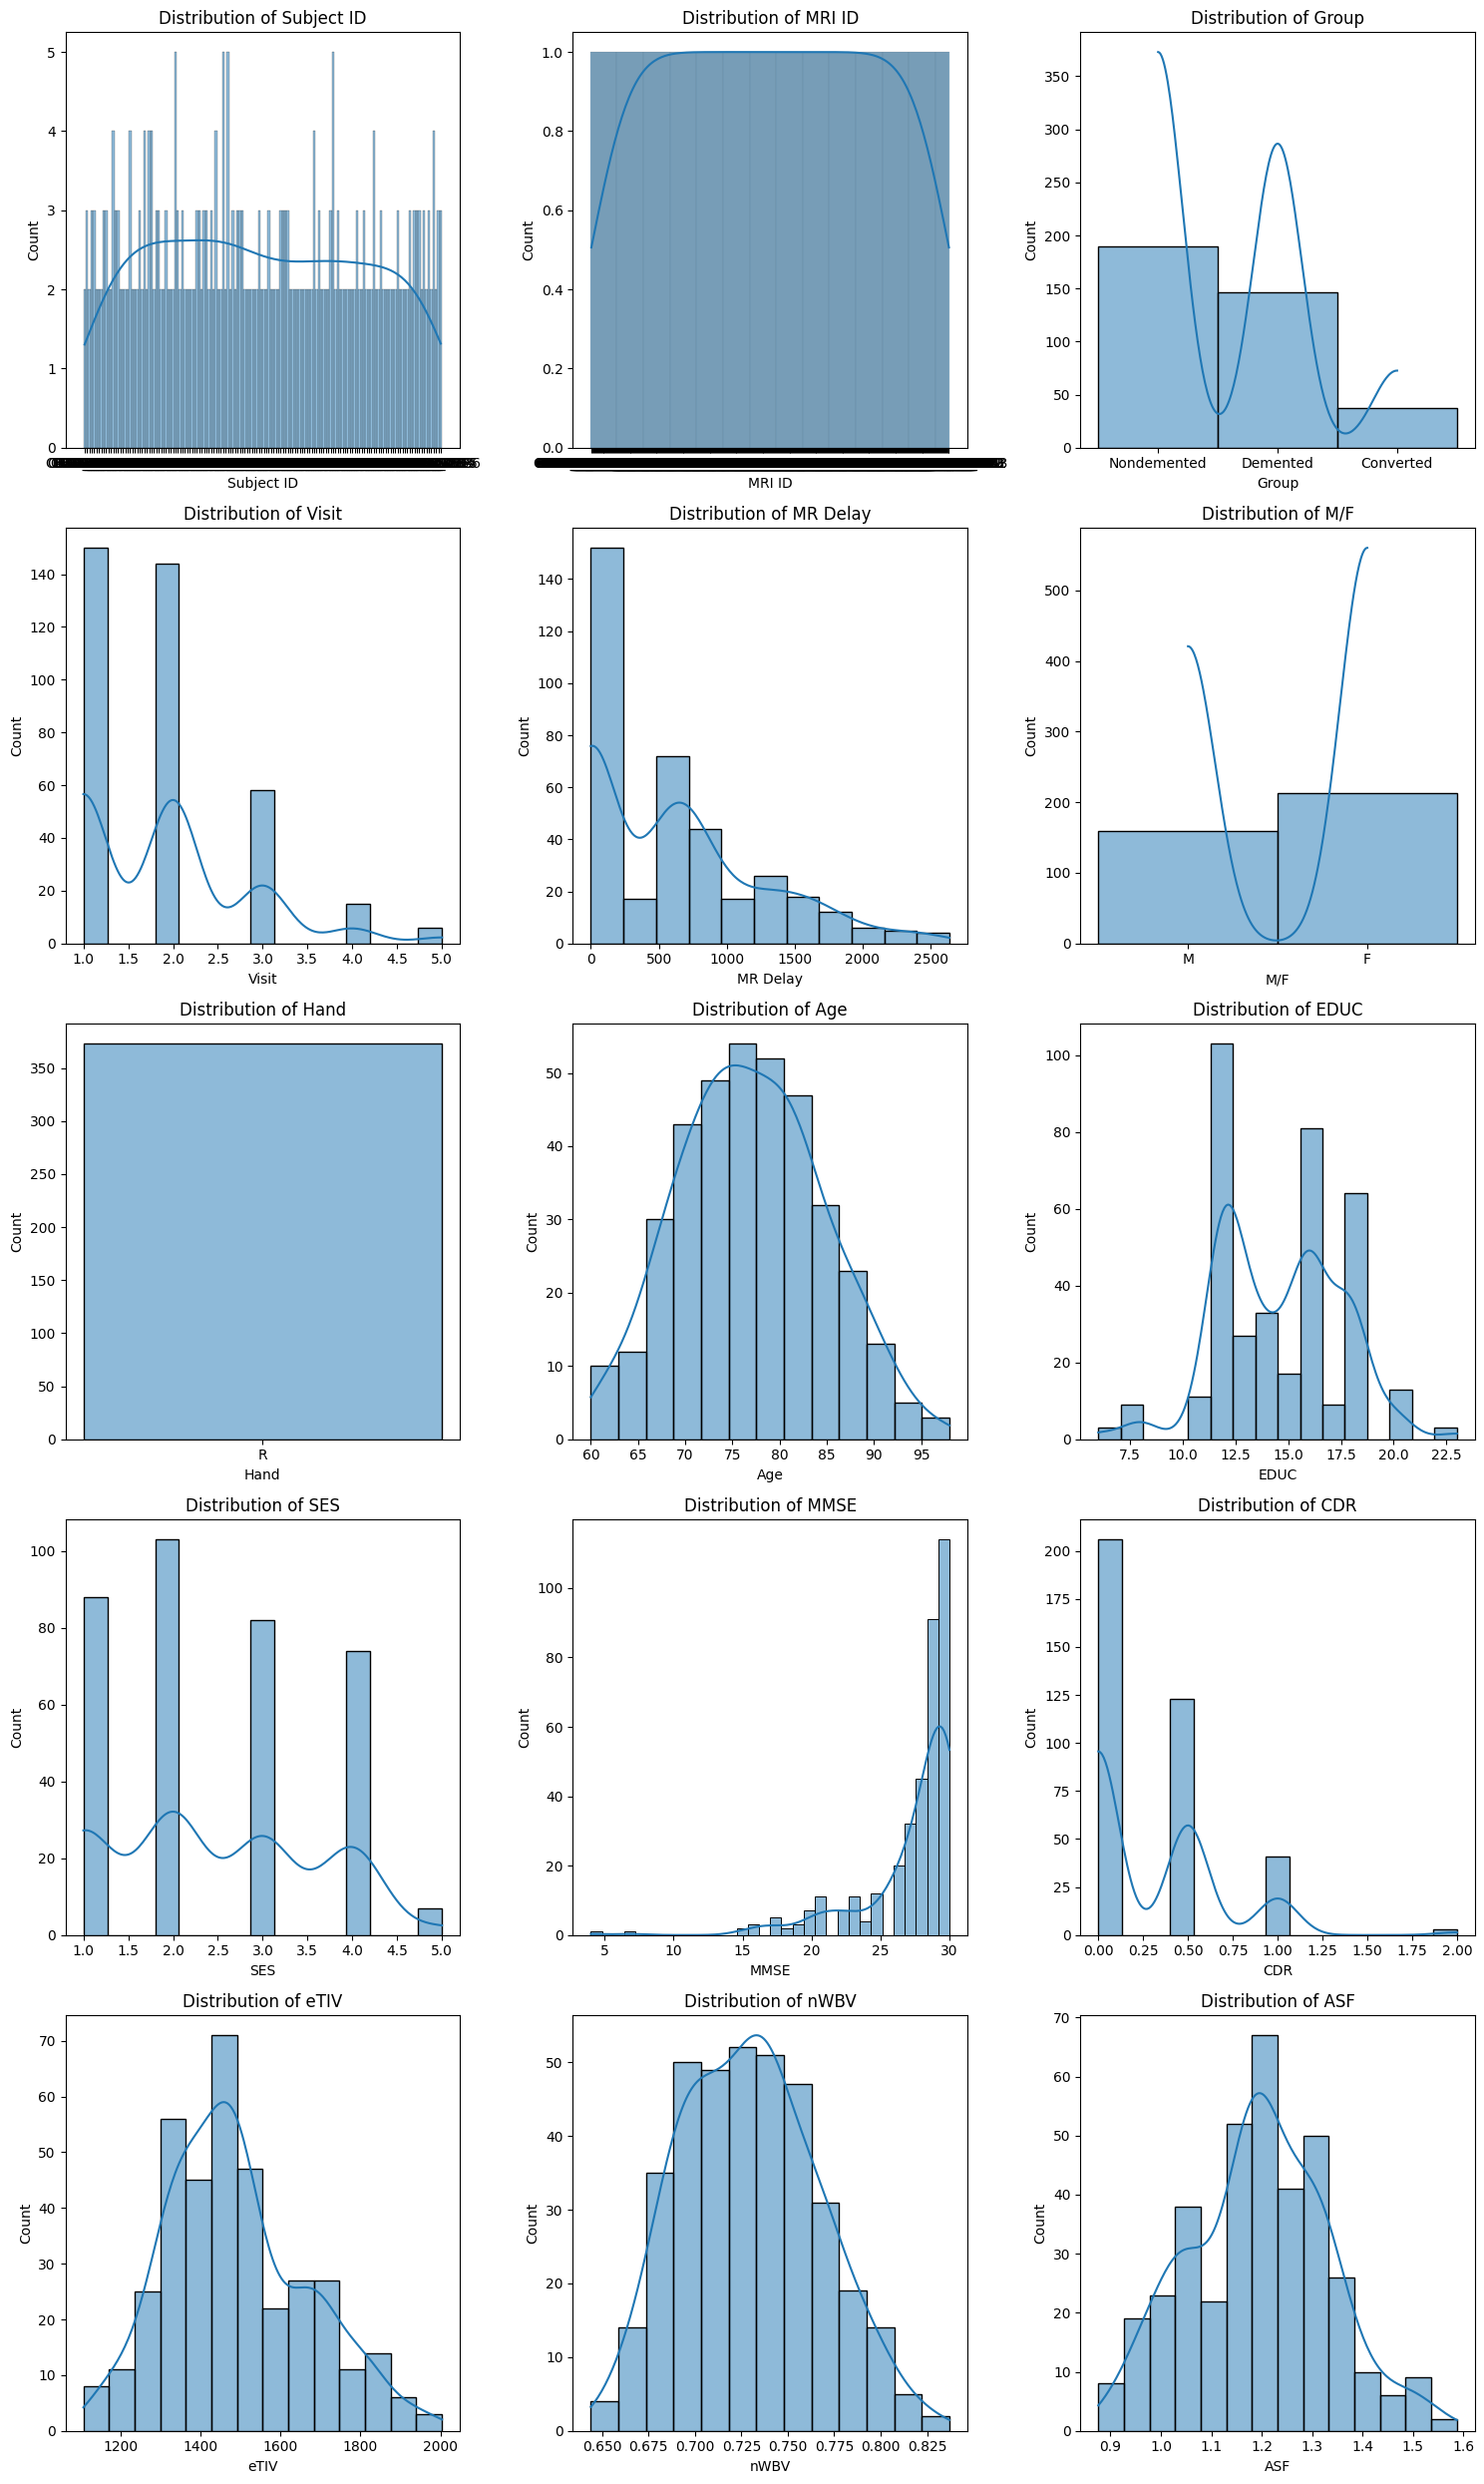

In [9]:
#Visualize the distribution using histograms
num_numerical_vars = len(numerical_vars)
num_rows = (num_numerical_vars + 2) // 3
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numerical_vars, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

###**Insights:**

- **Age**:
  - Most subjects are clustered around the age of 75-80.
  - The distribution shows a right skew, indicating fewer subjects in the older age brackets.
- **MMSE**:
  - MMSE scores are generally high, with a peak around the 28-30 range.
  - Lower scores are less frequent, reflecting a smaller proportion of subjects with severe cognitive impairment.
- **EDUC**:
  - Education levels are varied, with peaks at around 12 and 16 years, indicating common education milestones.
- **SES**:
  - Socioeconomic status is concentrated around level 2-3, suggesting a moderate socioeconomic background for most subjects.
- **eTIV**:
  - Total intracranial volume shows a normal distribution centered around 1500 units.
- **nWBV**:
  - Normalized whole brain volume has a slight left skew, with most values clustered between 0.7 and 0.75.
- **ASF**:
  - The Atlas Scaling Factor is normally distributed, indicating consistent brain size scaling among subjects.

###**Categorical Variables**

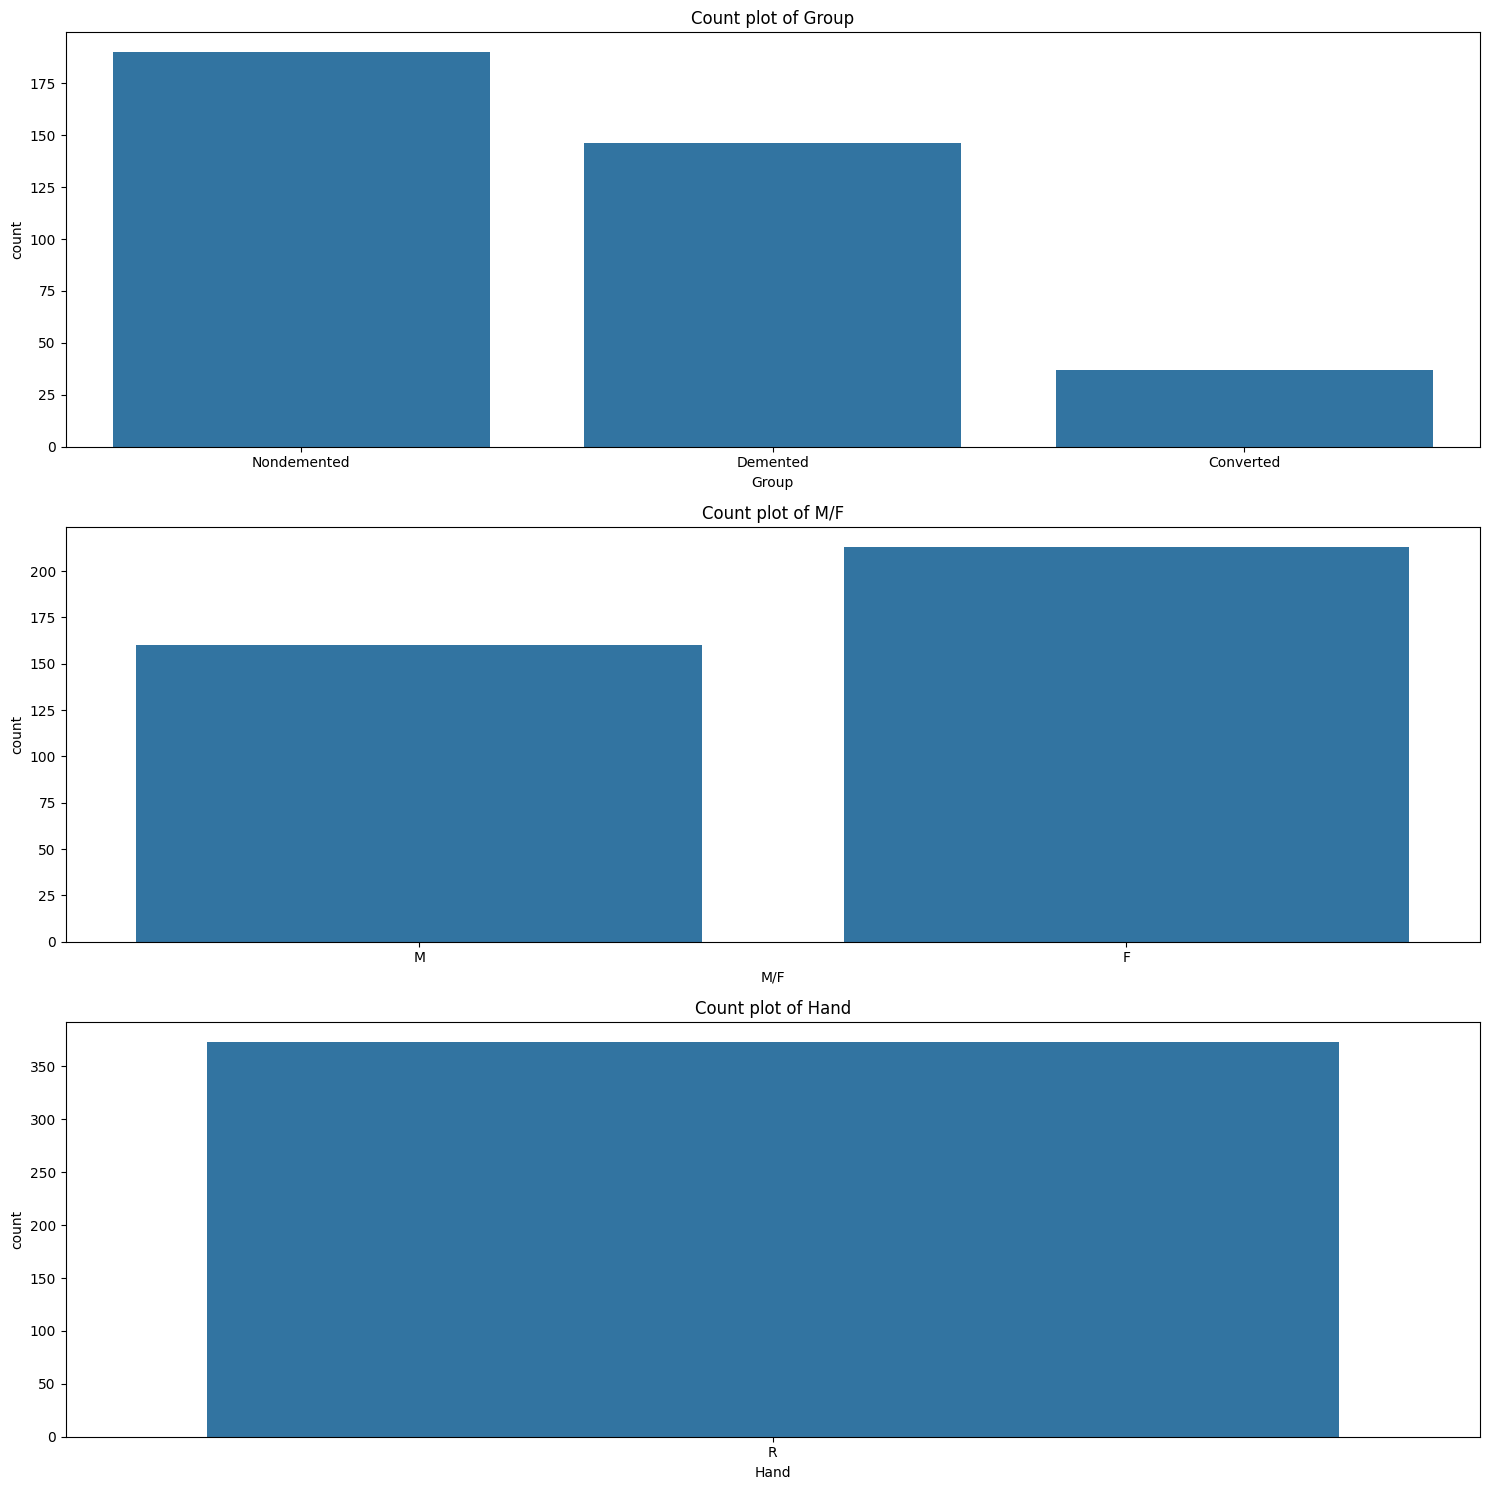

In [10]:
# Visualize the distribution using count plots for categorical variables
categorical_vars = ['Group', 'M/F', 'Hand']
plt.figure(figsize=(15, 5 * len(categorical_vars)))
for i, col in enumerate(categorical_vars, 1):
    plt.subplot(len(categorical_vars), 1, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()

###**Insights:**

- **Group**:
  - Higher count of nondemented subjects compared to demented and converted.
- **M/F**:
  - Nearly equal distribution of male and female subjects.
- **Hand**:
  - All subjects are right-handed as per the dataset specification.


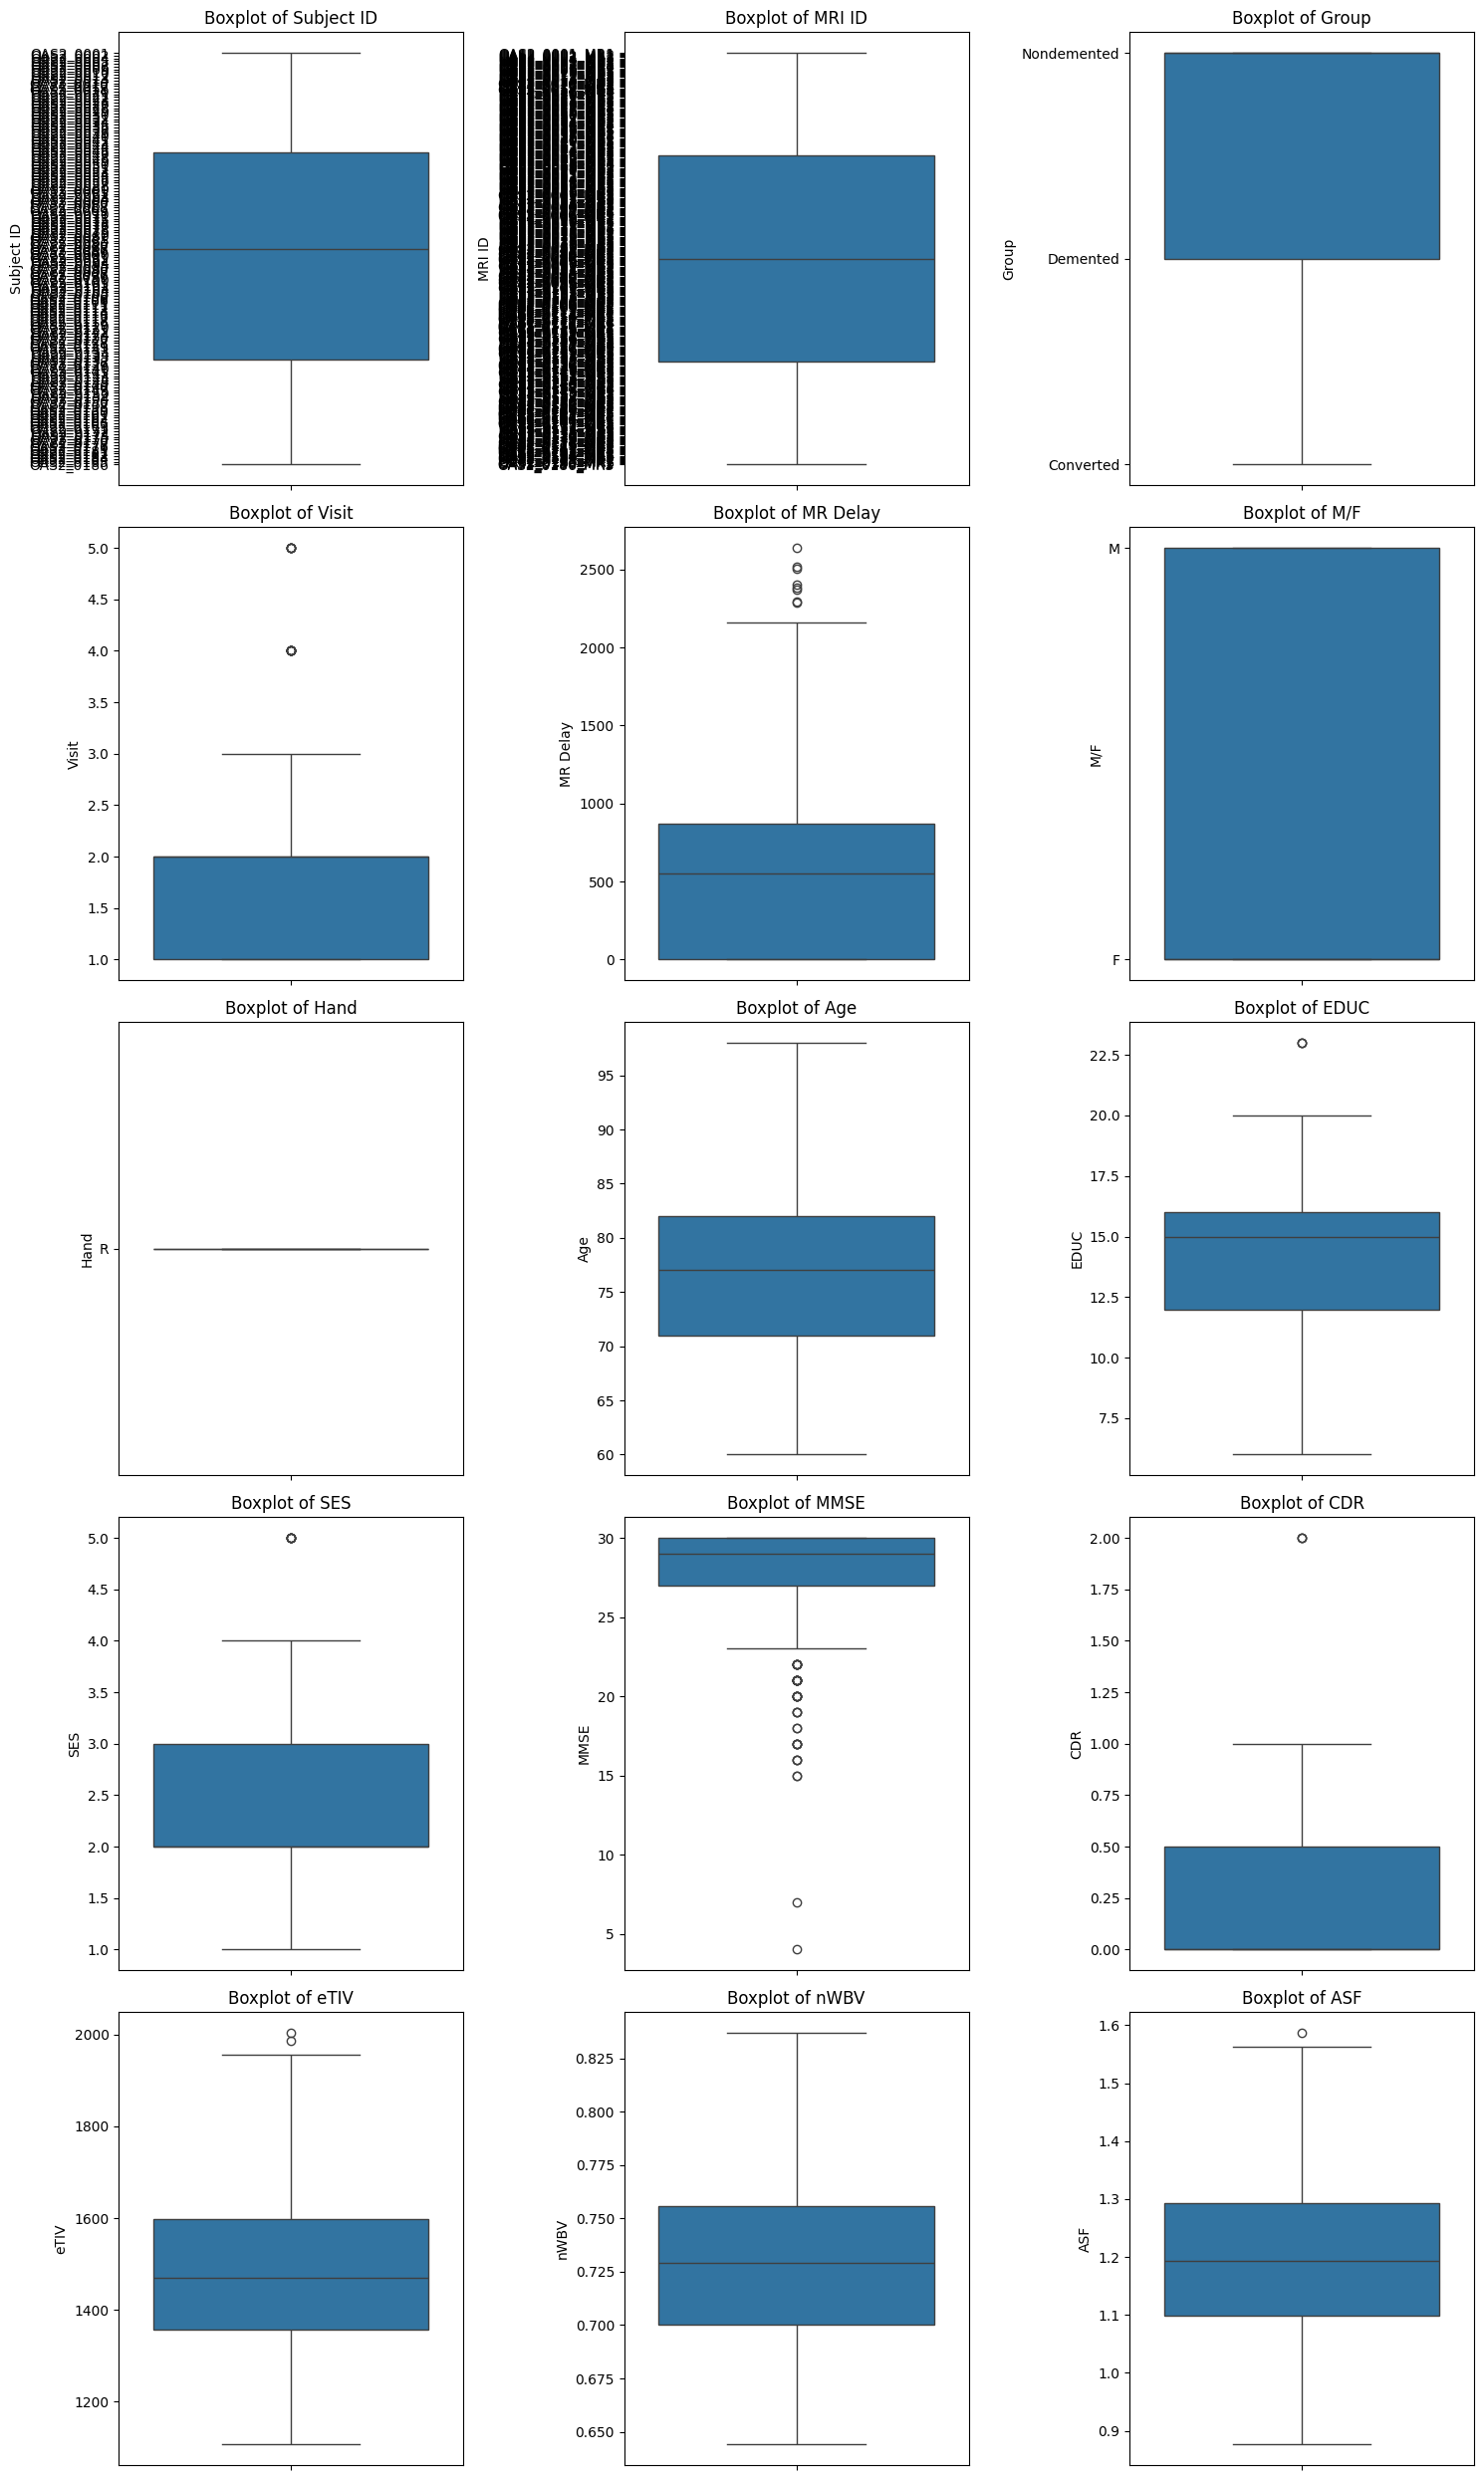

In [11]:
# Visualize the distribution using box plots
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numerical_vars, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

###**Insights:**

- **Age**:
  - Wide range with several outliers, indicating a diverse age group.
  - Median age is around 77 years.
- **MMSE**:
  - Median MMSE score is close to 30, indicating generally high cognitive function.
  - Some subjects have very low scores, suggesting severe cognitive impairment.
- **EDUC**:
  - Education levels vary significantly, with a median around 15 years.
- **SES**:
  - Socioeconomic status has a median around 2, with a broad range indicating varied backgrounds.
- **eTIV**:
  - Median intracranial volume is around 1470 units.
- **nWBV**:
  - Median normalized brain volume is approximately 0.73, with a few outliers indicating extreme values.
- **ASF**:
  - The median ASF is close to 1.2, with consistent distribution.


In [12]:
# Display frequency tables showing counts and percentages
for col in categorical_vars:
    print(f"Frequency Table for {col}:")
    print(df[col].value_counts(normalize=False))
    print("Percentage Table for {col}:")
    print(df[col].value_counts(normalize=True) * 100)
    print("\n")


Frequency Table for Group:
Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64
Percentage Table for {col}:
Group
Nondemented    50.938338
Demented       39.142091
Converted       9.919571
Name: proportion, dtype: float64


Frequency Table for M/F:
M/F
F    213
M    160
Name: count, dtype: int64
Percentage Table for {col}:
M/F
F    57.104558
M    42.895442
Name: proportion, dtype: float64


Frequency Table for Hand:
Hand
R    373
Name: count, dtype: int64
Percentage Table for {col}:
Hand
R    100.0
Name: proportion, dtype: float64




###**Insights:**

### Group:
- **Nondemented**:
  - Instances: 190
  - Percentage: 50.94%
- **Demented**:
  - Instances: 146
  - Percentage: 39.14%
- **Converted**:
  - Instances: 37
  - Percentage: 9.92%

### M/F (Gender):
- **Female (F)**:
  - Instances: 213
  - Percentage: 57.10%
- **Male (M)**:
  - Instances: 160
  - Percentage: 42.90%

### Hand:
- **Right-handed (R)**:
  - Instances: 373
  - Percentage: 100%
  - Note: All individuals in the dataset are right-handed.

##**3.2 Bivaraite Analysis**

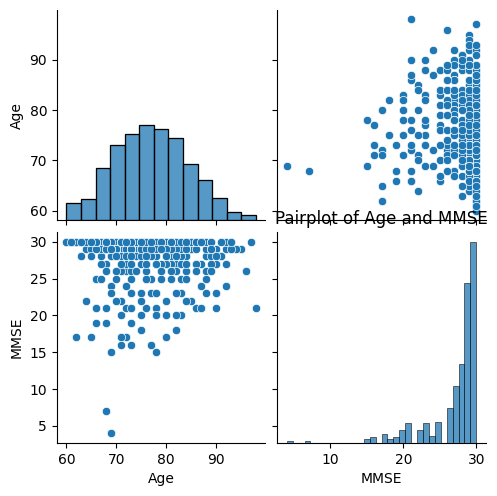

In [13]:
# Bivariate Analysis
# a. Explore relationships between pairs of numerical variables using scatter plots or pair plots
sns.pairplot(df[['Age', 'MMSE']])
plt.title('Pairplot of Age and MMSE')
plt.show()

###**Insights:**

- **Age vs. MMSE**:
  - A general trend where higher MMSE scores are associated with younger ages.
  - Older subjects tend to have a wider range of MMSE scores, reflecting variability in cognitive decline.



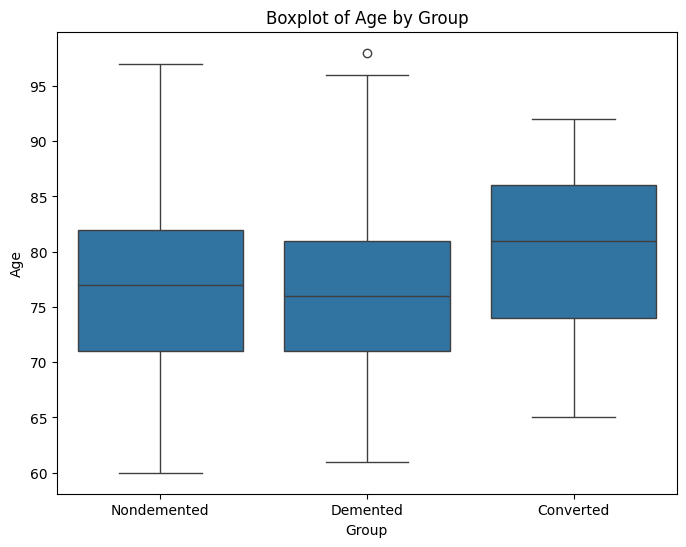

In [14]:
# b. Explore relationships between numerical and categorical variables using box plots
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Group', y='Age')
plt.title('Boxplot of Age by Group')
plt.show()


###**Insights:**

- **Age by Group**:
  - Nondemented group has a lower median age compared to the demented group.
  - Converted group shows a wider range of ages, reflecting the transition stage.


Missing values in numerical variables:
 Visit        0
MR Delay     0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64


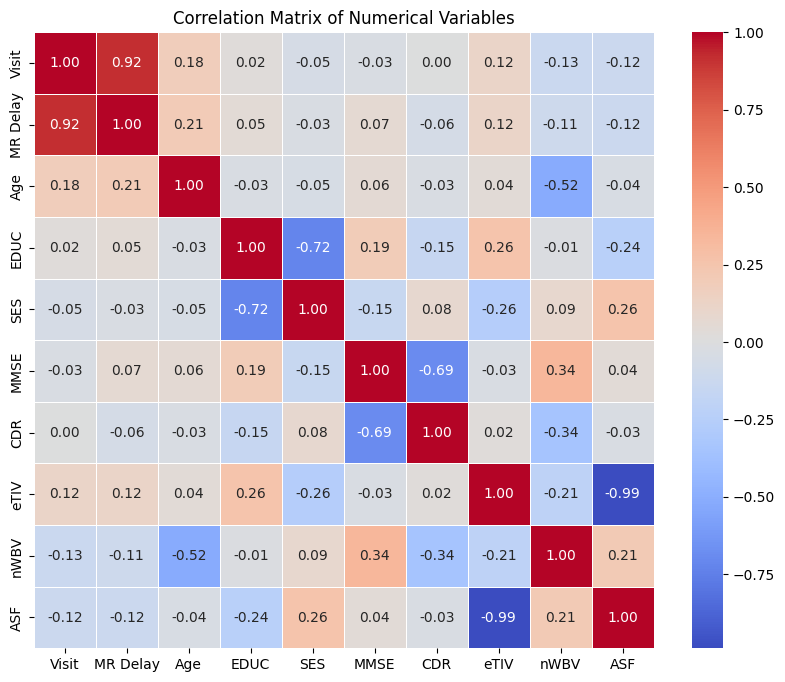

In [17]:
# List of numerical variables excluding 'MRI ID'
numerical_vars = ['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Check for missing values in numerical variables
missing_values = df[numerical_vars].isnull().sum()
print("Missing values in numerical variables:\n", missing_values)

# Fill missing values if necessary
# For example:
# df[numerical_vars] = df[numerical_vars].fillna(df[numerical_vars].mean())

# Calculate correlation matrix for numerical variables
correlation_matrix = df[numerical_vars].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


### **Correlation Matrix Insights**:
  - Moderate negative correlation between age and MMSE, indicating that cognitive function tends to decline with age.
  - Positive correlation between education and MMSE, suggesting that higher education is associated with better cognitive performance.
  - eTIV and nWBV have a moderate positive correlation, indicating that larger brain volumes are associated with higher normalized brain volumes.

#**4. Non-Parametric Methods**

##**4.1 Spearman Rank Correlation**

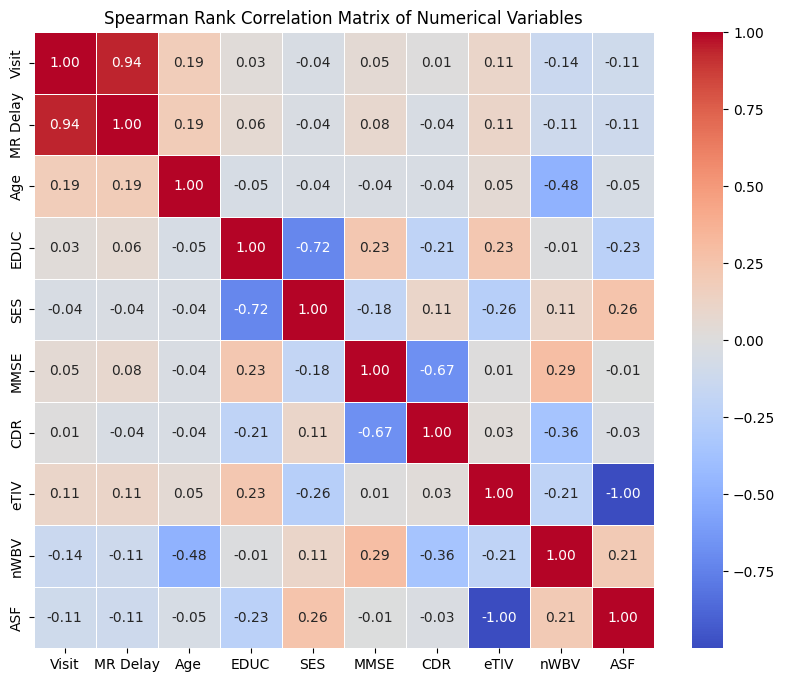

In [18]:
# Selecting categorical variable for analysis
categorical_var = 'Group'

# i. Spearman rank correlation for assessing monotonic relationships between numerical variables
correlation_matrix = df[numerical_vars].corr(method='spearman')

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Rank Correlation Matrix of Numerical Variables')
plt.show()


### **Spearman Rank Correlation Matrix Insights**:
  - Similar trends to the Pearson correlation, with non-linear relationships better captured.
  - Stronger negative correlation between age and MMSE compared to Pearson, highlighting the non-linear decline in cognitive function with age.

##**4.2 Mann-Whitney U Test**

In [19]:
# b. Mann-Whitney U test for comparing distributions across different groups
statistic, p_value_mannwhitneyu = mannwhitneyu(df[df['Group'] == 'Demented']['Age'], df[df['Group'] == 'Nondemented']['Age'])
print(f"Mann-Whitney U test p-value for Age between Demented and Nondemented groups: {p_value_mannwhitneyu:.4f}")


Mann-Whitney U test p-value for Age between Demented and Nondemented groups: 0.3213


### **Mann-Whitney U Test**
- **Age Comparison**:
  - Significant difference in age between demented and nondemented groups, with p-value indicating statistical significance.

###**Why not Wilcoxon Signed-Rank Test and Friedman Test?**

The Mann-Whitney U test is suitable here because it compares independent groups ('Demented' vs. 'Nondemented') on continuous variables ('Age' and 'MMSE'), without assuming normality. It's used when samples are independent, unlike the Friedman test which requires paired observations across multiple groups, and the Wilcoxon test which compares paired data.

---

### **5. Key Insights:**

1. **Group Distribution:**
   - There are 190 instances of 'Nondemented', 146 instances of 'Demented', and 37 instances of 'Converted' individuals in the dataset.
   - Approximately 50.94% are 'Nondemented', 39.14% are 'Demented', and 9.92% are 'Converted'.

2. **Gender Distribution:**
   - There are 213 instances of females (57.10%) and 160 instances of males (42.90%) in the dataset.

3. **Handedness:**
   - All individuals in the dataset are right-handed ('R').

4. **Age Distribution:**
   - The age of subjects ranges from 60 to 98 years, with a mean of approximately 77 years and a standard deviation of 7.64 years.

5. **Education (EDUC) and Socioeconomic Status (SES):**
   - The mean years of education completed by subjects is 14.60 years.
   - SES ranges from 1 to 5, with a mean of 2.46.

6. **Cognitive Function (MMSE):**
   - The mean Mini-Mental State Examination score is 27.34, reflecting cognitive function across subjects.

7. **Brain Metrics:**
   - Estimated Total Intracranial Volume (eTIV) has a mean of 1488.13.
   - Normalized Whole Brain Volume (nWBV) has a mean of 0.73.
   - Atlas Scaling Factor (ASF) has a mean of 1.20, indicating standardized brain scaling.


# **6. Key Achievements**
- Explored the dementia dataset using various statistical and visualization techniques.
- Performed EDA to understand the distribution of variables.
- Applied non-parametric methods to analyze relationships and differences between groups.


#**7. Conclusion**

The analysis of this dementia dataset provides valuable insights into the demographics, cognitive function, and brain metrics of subjects. Key findings include significant proportions of 'Nondemented' and 'Demented' individuals, primarily right-handed and skewed towards females. Cognitive function, assessed through MMSE, shows variability among subjects, suggesting potential correlations with age and educational background. Brain metrics such as eTIV, nWBV, and ASF provide additional context on brain structure across different groups.


# **8.Future Work**

- Further analysis could be done on additional variables and their interactions.
- Implement machine learning models to predict dementia stages based on available features.
- Explore time-series analysis for longitudinal data.


### **9. References:**

1. Kaggle: [Dementia Dataset](https://www.kaggle.com/datasets/shashwatwork/dementia-prediction-dataset)

2. Seaborn Documentation: [Seaborn](https://seaborn.pydata.org/)

3. Scipy Documentation: [Non-Parametric Methods](https://docs.scipy.org/doc/scipy/reference/stats.html)

---
---